<a href="https://colab.research.google.com/github/SpencerFonbuena/MentorCruise/blob/main/optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import torch
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display


# Motivations



> #### The first plot is an example of pathalogical curvature. If you are on the light green portions of the surface, your gradient will heavily favor going back and forth along the y axis, but not down the x axis. We will solve this with 2nd order momentums
> #### The second plot is an example of a saddle point. While it is highly unlikely that high dimensional surfaces will arrive at local minima, it is possible to have saddle points. If we didn't have momentum, we could get stock or seriously slow down. Momentum allows us to get off these points

Text(0.5, 0.92, 'surface')

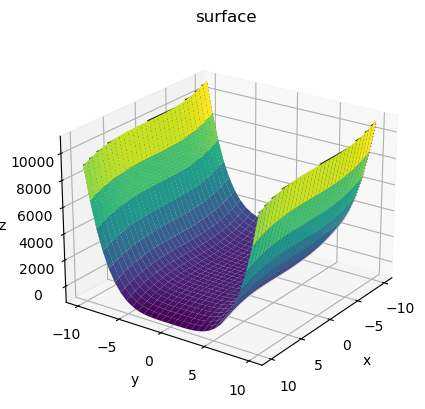

In [ ]:
def f(x, y):
    return -x**3 + y**4

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(23,35)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

Text(0.5, 0.92, 'surface')

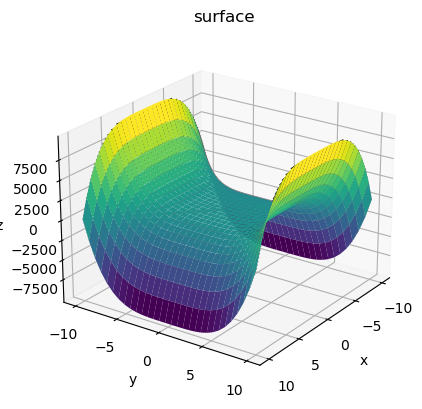

In [ ]:
def f(x, y):
    return -x**4 + y**4

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(23,35)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

# Mathematics

### SGD

> #### Equation:
>> ##### Wt+1 = Wt - alpha * Gt
> #### Description:
>> ##### Wt+1 => The updated parameter value after sgd
>> ##### Wt => The original parameter value at the current time
>> ##### alpha => The learning rate
>> ##### Gt => Calculated partial derivative of Wt

In [ ]:
# Let's keep the example above of z = -x**3 + y**4.
#Let's say we start at coordinates y= -10, x = -10
#the derivative values are -3x**2, and 4y**3
x = -10
y = -10
lr = .005

#Current gradients
pdx1 = (-3*(x)**2)
pdy1 = (4* (y)**3)

#Parameter update
Wt1_x1 = x - lr * pdx1
Wt1_y1 = y - lr * pdy1

print( 'Derivatives',pdx1, pdy1)
print('Parameters', Wt1_x1, Wt1_y1)


#as we can see, the derivative in the y direction, is more than 10x the size, which could lead to slow learning and big oscillations

Derivatives -300 -4000
Parameters -8.5 10.0


### SGD + Momentum

> #### Equation:
>> ##### Vt+1 = Beta * Vt + Gt
>> ##### Wt+1 = Wt - alpha * Vt+1
> #### Description:
>> #### Vt+1 => Momentum Value
>> #### Beta => Weight put on past values.
>> #### Vt => Previous momentum value
>> ##### Gt => Calculated partial derivative of Wt
>> ##### Wt+1 => The updated parameter value after sgd + momentum
>> ##### Wt => The original parameter value at the current time
>> ##### alpha => The learning rate
> #### Memory Add:
>> ##### In terms of memory complexity, we can see that we have added, for each gradient, an extra term. This means that if we have 1M parameters, we will have to add an additional 1M parameters. at float32 precision that is 4MB.

In [ ]:
#let's assume we have a beta of .9
# We're going to use the previous gradient as a proxy for Vt, because on our last example, we didn't apply momentum

# hyperparameter
beta = .9
lr = lr

# current position (parameters)
x = Wt1_x1
y = Wt1_y1


#past momentum
Vxt = pdx1
Vyt = pdy1

#current gradients
pdx2 = (-3*(x)**2)
pdy2 = (4*(y)**3)

#momentum
vt1_pdx = (beta * Vxt + pdx2)
vt1_pdy = (beta * Vyt + pdy2)

#parameter update
Wt1_x = x - vt1_pdx * lr
Wt1_y = y - vt1_pdy * lr

#Parameters for SGD W/O momentum
fpdx = x - lr * pdx2
fpdy = y - lr * pdy2

print('Gradients:', vt1_pdx, vt1_pdy)
print('Parameters',Wt1_x, Wt1_y)
print('Update', vt1_pdx * lr, vt1_pdy * lr)

print('badgrads',pdx2, pdy2)
print('badparams', fpdx,fpdy)
print('Update',lr * pdx2, lr * pdy2)

# As we can see, using momentum has allowed us to increase the gradient in the x direction, and decrease it in the y direction because of the conflicting signs.
#The gradients are huge, but they had to be big enough to make the point of a gradient overshooting the valley

Gradients: -486.75 400.0
Parameters -6.06625 8.0
Update -2.43375 2.0
badgrads -216.75 4000.0
badparams -7.41625 -10.0
Update -1.08375 20.0


### Adam

> #### Equation
>> ##### Mt+1 = Beta1 * Mt + (1-Beta1) * Gt
>> ##### Vt+1 = Beta2 * Vt + (1-B2) * G2t
>> ##### Wt+1 = Wt - (  ((Alpha) / (sqrt(Vt+1) + Epsilon))  ) * Mt+1
> #### Description
>> ##### Beta2 Weight put on past values for the RMS prop / LR scaler
>> ##### G2t => The squared current gradient
>> ##### Vt+1 => The second order momentum. It scales the learning rate. The bigger the gradient, the smaller the learning rate
> #### Memory Add
>> ##### We've just added a couple bytes for the Beta2 equation, and then similar to momentum, we've added yet another parameter for each original parameter. For 1M parameters, Adam adds 8 MB to SGD, or 2 million parameters
> #### Final Thoughts
>> ##### Comparing each strategy for the second update of this little toy example, it's clear that Adam would be much more robust to crazy values, as it scales the updates. Momentum also went a long way to prevent pinging back and forth between canyon walls.

In [ ]:
# hyperparameter
beta1 = beta
beta2 = .999
lr = lr
epsilon = 1e-8

# current position (parameters)
x = Wt1_x1
y = Wt1_y1


#past momentum
mxt = pdx1
myt = pdy1

#Don't have this value, so estimating it with past momentum
vxt = pdx1**2
vyt = pdy1**2

#current gradients
pdx2 = (-3*(x)**2)
pdy2 = (4*(y)**3)

#squared current gradients
pdx22 = pdx2**2
pdy22 = pdy2**2

mxt1 = (beta1 * mxt) + pdx2
myt1 = (beta1 * myt) + pdy2

vxt1 = (beta2 * vxt) + ((1-beta2) * pdx22)
vyt1 = (beta2 * vyt) + ((1-beta2) * pdx22)

Wxt1 = x - (lr/(vxt1**.5 + epsilon)) * mxt1
Wyt1 = y - (lr/(vyt1**.5 + epsilon)) * myt1
print(f"\nsgd gradients -216.75 | 4000.0 \nsgd parameters -7.41625 | -10.0\nsgd update -1.08375 | 20.0 \n\n\nsgd + momentum gradients: -486.75 | 400.0 \nsgd + momentum parameters -6.06625 | 8.0 \nsgd+momentum update -2.43375 | 2.0 \n\n\nadam gradients {mxt1: .3f}| {myt1: .3f} \nadam parameters {Wxt1: .3f} | {Wyt1: .3f} \nadam update {(lr/(vxt1**.5 + epsilon)) * mxt1: .3f} | {(lr/(vyt1**.5 + epsilon)) * myt1: .3f}")


sgd gradients -216.75 | 4000.0 
sgd parameters -7.41625 | -10.0
sgd update -1.08375 | 20.0 


sgd + momentum gradients: -486.75 | 400.0 
sgd + momentum parameters -6.06625 | 8.0 
sgd+momentum update -2.43375 | 2.0 


adam gradients -486.750|  400.000 
adam parameters -8.492 |  9.999 
adam update -0.008 |  0.001


# Weight Decay in Adam(W)

> #### Overview of Image Steps
>> ##### step 6: Calculating previous gradient
>> ##### step 7: Calculating momentum
>> ##### step 8: Calculating RMS prop (2nd order momentum)
>> ##### step 9-10: Scaling for beginning of optimization when mt-1 and vt-1 == 0
>> ##### step 12: Updating parameter
> #### Difference between Adam + L2 and AdamW
>> ##### For Adam + L2, the effect of your reg is immediately multiplied by 1-beta1 (which in many cases is .1). After that it could be scaled, and then stuck in the denominator of the 2nd order momentum. All these operations water down the effect of L2 with Adam.
>> ##### For AdamW, the L2 is placed at the last operation, meaning it's effect isn't vanishing so to speak. This allows it to function much better and have a greater intended effect

![alt](https://machine-learning-note.readthedocs.io/en/latest/_images/AdamW_algo.png)

#### Picture Description

### Grad Accumulation

> #### If you have limited GPU resources, (Let's say enough to put you batch size at 32) and for good performance you need a batch size of 64, grad accumulation can help you. It is done by running through a batch, and then, instead of making an update and calling zero.grad(), running through one more batch, and then operating as usual. This allows the steps taken to be more monotonically accurate, but it does make your model slower

In [ ]:
# You could achieve it by doing something like the following

opt.zero_grad()
for i, (input, target) in enumerate(dataset):
    pred = net(input)
    loss = crit(pred, target)
    # one graph is created here
    loss.backward()
    # graph is cleared here
    if (i+1)%10 == 0:
        # every 10 iterations of batches of size 10
        opt.step()
        opt.zero_grad()

## LARS

> #### As models become bigger, there is a tendency to want to make the batch sizes bigger. However, the bigger the batches, the fewer iterations there are per epoch, which means fewer updates, and longer training. A naive solution is to simply increase the learning rate to compensate. However, a high learning rate can lead to unstable training. LARS seeks to remidy this by doing the following:
>> ##### Lars solves the problem of training large models by adapting the learning rate for each layer. They do it by calculating the ratio of the L2 norm of the layer weights, to the L2 norm of the gradients. They call this ratio the "trust ratio"
>> ##### Essentially, what this does is makes the learning rate small, if the gradient in relation to the weight is big. Big gradients to small weights is what causes divergence and instability, and this helps solve that

In [ ]:
# Toy Example

global_lr = .0003

norm_layer1 = .1
grad_layer1 = .01

norm_layer2 = .1
grad_layer2 = .1

norm_layer3 = .1
grad_layer3 = 1

norm_layer4 = .2
grad_layer4 = .06

norm_layer5 = .1
grad_layer5 = .001

trustratio1 = norm_layer1/grad_layer1
trustratio2 = norm_layer2/grad_layer2
trustratio3 = norm_layer3/grad_layer3
trustratio4 = norm_layer4/grad_layer4
trustratio5 = norm_layer5/grad_layer5

update_1 = global_lr*trustratio1
update_2 = global_lr*trustratio2
update_3 = global_lr*trustratio3
update_4 = global_lr*trustratio4
update_5 = global_lr*trustratio5

print(trustratio1,trustratio2,trustratio3,trustratio4,trustratio5)
print(update_1, update_2, update_3, update_4, update_5)

10.0 1.0 0.1 3.3333333333333335 100.0
0.0029999999999999996 0.0003 2.9999999999999997e-05 0.001 0.03


> #### Lamb makes a few changes to LARS:
>> ##### 1. It adds in second order momentum to the further adapt the learning rate.